# Digikala comment verification contest

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *

In [2]:
 bs=48
# bs=24
#bs=128

In [3]:
torch.cuda.set_device(0)

In [4]:
data_path = Config.data_path()

This will create a `fawiki` folder, containing a `viwiki` text file with the wikipedia contents.

In [5]:
lang = 'fa'

In [6]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)
lm_fns = [f'{lang}_wt', f'{lang}_wt_vocab']

## wikipedia model

### Download data

In [12]:
from nlputils import split_wiki,get_wiki

In [24]:
get_wiki(path,lang)

extracting...


In [25]:
path.ls()

[WindowsPath('C:/Users/Amir/.fastai/data/fawiki/fawiki'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/fawiki-latest-pages-articles.xml'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/fawiki-latest-pages-articles.xml.bz2'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/log'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/wikiextractor')]

In [26]:
!head -n4 {path}/{name}

<doc id="594" url="https://fa.wikipedia.org/wiki?curid=594" title="ÙˆÛŒÚ©ÛŒâ€ŒÙ¾Ø¯ÛŒØ§">
ÙˆÛŒÚ©ÛŒâ€ŒÙ¾Ø¯ÛŒØ§

ÙˆÛŒÚ©ÛŒâ€ŒÙ¾Ø¯ÛŒØ§ ÛŒÚ© Ø¯Ø§Ù†Ø´Ù†Ø§Ù…Ù‡ Ø¨Ø±Ø®Ø· Ú†Ù†Ø¯Ø²Ø¨Ø§Ù†Ù‡ Ù…Ø¨ØªÙ†ÛŒ Ø¨Ø± ÙˆØ¨ Ø¨Ø§ Ù…Ø­ØªÙˆØ§ÛŒ Ø¢Ø²Ø§Ø¯ Ùˆ Ù‡Ù…Ú©Ø§Ø±ÛŒ Ø¨Ø§Ø² Ø§Ø³Øª Ú©Ù‡ Ø¨Ø§ Ù‡Ù…Ú©Ø§Ø±ÛŒ Ø§Ù�Ø±Ø§Ø¯ Ø¯Ø§ÙˆØ·Ù„Ø¨ Ù†ÙˆØ´ØªÙ‡ Ù…ÛŒâ€ŒØ´ÙˆØ¯ Ùˆ Ù‡Ø± Ú©Ø³ÛŒ Ú©Ù‡ Ø¨Ù‡ Ø§ÛŒÙ†ØªØ±Ù†Øª Ùˆ ÙˆØ¨ Ø¯Ø³ØªØ±Ø³ÛŒ Ø¯Ø§Ø´ØªÙ‡ Ø¨Ø§Ø´Ø¯ Ù…ÛŒâ€ŒØªÙˆØ§Ù†Ø¯ Ù…Ù‚Ø§Ù„Ø§Øª Ø¢Ù† Ø±Ø§ Ø¨Ø¨ÛŒÙ†Ø¯ Ùˆ ÙˆÛŒØ±Ø§ÛŒØ´ Ú©Ù†Ø¯. Ù†Ø§Ù… ÙˆÛŒÚ©ÛŒâ€ŒÙ¾Ø¯ÛŒØ§ ÙˆØ§Ú˜Ù‡â€ŒØ§ÛŒ ØªØ±Ú©ÛŒØ¨ÛŒ Ø§Ø³Øª Ú©Ù‡ Ø§Ø² ÙˆØ§Ú˜Ù‡â€ŒÙ‡Ø§ÛŒ ÙˆÛŒÚ©ÛŒ (ÙˆØ¨Ú¯Ø§Ù‡ Ù…Ø´Ø§Ø±Ú©ØªÛŒ) Ùˆ Ø§Ù�Ù†Ø³Ø§ÛŒÚ©Ù„ÙˆÙ¾Ø¯ÛŒØ§ (Encyclopedia) (Ø¯Ø§Ù†Ø´Ù†Ø§Ù…Ù‡ ÛŒØ§ Ø¯Ø§Ø¦Ø±Ø©Ø§Ù„Ù…Ø¹Ø§Ø±Ù�) Ú¯Ø±Ù�ØªÙ‡ Ø´Ø¯Ù‡â€ŒØ§Ø³Øª. Ù‡Ø¯Ù� ÙˆÛŒÚ©ÛŒâ€ŒÙ¾Ø¯ÛŒØ§ Ø¢Ù�Ø±ÛŒÙ†Ø´ Ùˆ Ø§Ù†ØªØ´Ø§Ø± Ø¬Ù‡Ø§Ù†ÛŒ ÛŒÚ© Ø¯Ø§Ù†Ø´Ù†Ø§Ù…Ù‡ Ø¨Ø§ Ù…Ø­ØªÙˆØ§ÛŒ Ø¢Ø²Ø§Ø¯ Ø¨Ù‡ ØªÙ…Ø§Ù…ÛŒ Ø²Ø¨Ø§Ù†â€ŒÙ‡Ø§ÛŒ Ø²Ù†Ø¯Ù‡Ù” Ø¯Ù†ÛŒØ§ Ø§Ø³Øª.


In [34]:
dest = split_wiki(path,lang)

C:\Users\Amir\.fastai\data\fawiki\docs already exists; not splitting
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000


In [35]:
dest.ls()[:5]

[WindowsPath('C:/Users/Amir/.fastai/data/fawiki/docs/11B-X-1371.txt'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/docs/6LoWPAN.txt'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/docs/ABC ME (کانال تلوزیونی).txt'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/docs/AWK.txt'),
 WindowsPath('C:/Users/Amir/.fastai/data/fawiki/docs/Awwwards.txt')]

In [41]:
defaults.cpus=1
data = (TextList.from_folder(dest)
            .split_by_rand_pct(0.1, seed=42)
            .label_for_lm()           
            .databunch(bs=bs, num_workers=1))



(60000, 40124)

In [43]:
data.save(f'{lang}_databunch')
len(data.vocab.itos),len(data.train_ds)

(60000, 40124)

In [7]:
data = load_data(path, f'{lang}_databunch', bs=bs)

In [8]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5, pretrained=False).to_fp16()

In [9]:
lr = 1e-2
lr *= bs/48  # Scale learning rate by batch size

In [10]:
learn.unfreeze()
learn.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.811141,4.802375,0.249563,59:26
1,4.792569,4.827556,0.244815,1:00:19
2,4.836578,4.816059,0.245082,1:00:06
3,4.756877,4.759817,0.249238,59:42
4,4.689855,4.698633,0.254146,59:04
5,4.633632,4.597547,0.261664,58:57
6,4.586514,4.491583,0.269553,58:13
7,4.470330,4.377115,0.279075,57:58
8,4.418664,4.294336,0.287044,57:58
9,4.340699,4.265421,0.289795,57:59


Save the pretrained model and vocab:

In [11]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)
learn.to_fp32().save(mdl_path/lm_fns[0], with_opt=False)
learn.data.vocab.save(mdl_path/(lm_fns[1] + '.pkl'))

## sentiment analysis

### Language model

In [8]:
train_df = pd.read_csv('train.csv')
train_df.loc[pd.isna(train_df.title),'title']='NA'
train_df.loc[pd.isna(train_df.comment),'comment']='NA'
train_df.head()

,id,title,comment,rate,verification_status
0,0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,100.0,0
1,1,شش ماه مصرف!!,دوبار از این مدل گرفتم اولاش خوبه ولی بعد از ش...,5.0,0
2,2,کارآیی,به نظر من فقط برای کارای سبک و دیدن فیلم و مطا...,60.0,0
3,3,بررسی کمی و کیفی,برای من بسیار مناسب و خریدش در شگفت انگیز حتما...,0.0,0
4,4,بسته بندی ضعیف,ظاهر بامزه ای داره ولی عکسش شبیه خودش نیست جنس...,60.0,0


In [9]:
test_df = pd.read_csv('test.csv')
test_df.loc[pd.isna(test_df.title),'title']='NA'
test_df.loc[pd.isna(test_df.comment),'comment']='NA'
test_df.head()

,id,title,comment,rate
0,180000,خیلی ناراحتم,سلام. دیجی کالا این چه وضعشه چرا یهو قیمت میره...,80.0
1,180001,پر قدیرت,واقعا قدرتش نسبت به بطری های دیگه بهتره,85.0
2,180002,ظریف و کارامد,من امروز رسید دستم .تا حالا 50 باری افتاده از ...,68.0
3,180003,خیلی خوشگله و جالب,خیلی خوبه ولی من یک چهارم این قیمت خریدم\r\nچه...,80.0
4,180004,کمبود وسایل,کابل اتصال دستگاه رو با کامپیوتر ندادن,0.0


In [10]:
df = pd.concat([train_df,test_df], sort=False)

In [10]:
df['title'].isnull().sum()

0

In [34]:
defaults.cpus=1
data_lm = (TextList.from_df(df, path, cols=['title', 'comment'])
    .split_by_rand_pct(0.01, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

In [13]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=lm_fns, drop_mult=1.0)

In [14]:
lr = 1e-3
lr *= bs/48

In [15]:
learn_lm.fit_one_cycle(2, lr*10, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [37]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(8, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.953906,4.784559,0.201114,06:26
1,4.803169,4.635342,0.215653,06:25
2,4.688790,4.540329,0.225141,06:25
3,4.611199,4.481283,0.230816,06:27
4,4.541575,4.442273,0.234635,06:28
5,4.477453,4.418175,0.237005,06:31
6,4.456811,4.406856,0.238196,06:28
7,4.434050,4.405227,0.238458,06:27


In [39]:
learn_lm.save(f'{lang}fine_tuned')
learn_lm.save_encoder(f'{lang}fine_tuned_enc')

### Classifier

In [35]:
defaults.cpus=1
data_clas = (TextList.from_df(train_df, path, vocab=data_lm.vocab, cols=['title', 'comment'])
#      .addtest(TextList.from_df(test_df, path, vocab=data_lm.vocab, cols=['title', 'comment'])
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols='verification_status')
    .databunch(bs=bs, num_workers=1))

data_clas.save(f'{lang}_textlist_class2')

In [11]:
data_clas = load_data(path, f'{lang}_textlist_class', bs=bs, num_workers=1)

In [41]:
from sklearn.metrics import f1_score

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1))

In [12]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy])

In [13]:
learn_c.load_encoder(f'{lang}fine_tuned_enc')
learn_c.freeze()

In [14]:
lr=2e-2
lr *= bs/48

In [15]:
learn_c.fit_one_cycle(2, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.296339,0.271149,0.900611,02:32
1,0.283715,0.258915,0.906889,02:33


In [16]:
gc.collect()
torch.cuda.empty_cache()

In [17]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.273607,0.273255,0.911722,03:03
1,0.263178,0.236808,0.915333,03:03


In [18]:
gc.collect()
torch.cuda.empty_cache()

In [63]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4)), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [69]:
learn_c.unfreeze()
learn_c.fit_one_cycle(1, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 8.00 GiB total capacity; 5.98 GiB already allocated; 32.65 MiB free; 214.82 MiB cached)

In [18]:
learn_c.save(f'{lang}clas')

In [19]:
preds,y,losses = learn_c.get_preds(with_loss=True)

torch.return_types.topk(
values=tensor([1.3921e+01, 7.4548e+00, 5.0152e+00,  ..., 1.8988e-04, 4.2557e-05,
        -0.0000e+00]),
indices=tensor([  555,    60,  2185,  ..., 10418,     7,  5618]))

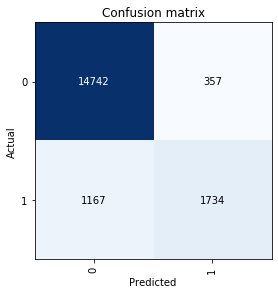

In [20]:
interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()
interp.top_losses()

In [42]:
str(learn_c.predict('dash')[1].item())

C:\Users\Amir\Anaconda3\envs\fastai\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


'0'

In [21]:
import warnings
warnings.filterwarnings('ignore')

r = open('res8.csv', 'w')
r.write("id,verification_status\n")
for index, row in test_df.iterrows():
    r.write(str(row['id']) + ',' + str(learn_c.predict(row['title'] + ' ' + row['comment'])[2].tolist()[0] ) + "\n")
    if index%1000 == 0: print(index)
#     break
r.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


Competition top 3 f1 scores: 0.90, 0.89, 0.89. Winner used an ensemble of 4 models: TextCNN, VDCNN, HARNN, and SARNN.

## Ensemble

In [65]:
data_clas = load_data(path, f'{lang}_textlist_class', bs=bs, num_workers=1)
learn_c = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy]).to_fp16()
learn_c.load(f'{lang}clas', purge=False);

In [69]:
preds,targs = learn_c.get_preds(ordered=True)
accuracy(preds,targs),f1(preds,targs)

(tensor(0.9111), tensor(0.8952))

In [67]:
data_clas_bwd = load_data(path, f'{lang}_textlist_class_bwd', bs=bs, num_workers=1, backwards=True)
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, drop_mult=0.5, metrics=[accuracy]).to_fp16()
learn_c_bwd.load(f'{lang}clas_bwd', purge=False);

In [70]:
preds_b,targs_b = learn_c_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b),f1(preds_b,targs_b)

(tensor(0.9092), tensor(0.8957))

In [71]:
preds_avg = (preds+preds_b)/2

In [72]:
accuracy(preds_avg,targs_b),f1(preds_avg,targs_b)

(tensor(0.9154), tensor(0.9016))